#### Individual Class Project

## Predicting Major League Baseball Game Outcomes
***

## Executive Summary:

#### Overview:


#### Project Goals:


#### Outline of Process: 

- The plan for this project is to do the following:
    - Acquire data from baseball-reference.com.
    - Prepare data by dropping columns, renaming columns, handling null values and creating new columns.
    - Explore data by visualizing data and running hypothesis tests on key features.
    - Create machine learning models to predict wins.
    - Test best performing model on out of sample data to evaluate performance

#### Conclusion & Key Findings:


#### Recommendations & Next Steps:

***

## Acquire 

In this section we will acquire the Major League Baseball data using `acquire.py` file.

- All data is acquired from batting game logs for all 30 Major League Baseball teams for the year 2021
- All batting logs were combined into one .csv file
- Data source is baseball-reference.com

#### Read data from local .csv into a dataframe to use for exploration and modeling

In [1]:
#Disable warnings
import warnings
warnings.filterwarnings('ignore')

#Import libraries 
import pandas as pd
import numpy as np

#Import custom libraries
import acquire
import prepare
import explore

#Import libraries for graphing
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [2]:
df = acquire.get_batting_log_data()
df.head()

,Team,Rk,Gtm,Date,Unnamed: 4,Opp,Rslt,PA,AB,R,...,SB,CS,BA,OBP,SLG,OPS,LOB,#,Thr,Opp. Starter (GmeSc)
0,Houston Astros,1,1,1-Apr,@,OAK,"W,8-1",43,33,8,...,0,0,0.273,0.395,0.545,0.941,8,11,R,C.Bassitt(49)
1,Houston Astros,2,2,2-Apr,@,OAK,"W,9-5",45,40,9,...,0,0,0.315,0.409,0.575,0.984,9,9,L,J.Luzardo(38)
2,Houston Astros,3,3,3-Apr,@,OAK,"W,9-1",43,38,9,...,0,0,0.324,0.405,0.550,0.954,7,10,L,C.Irvin(34)
3,Houston Astros,4,4,4-Apr,@,OAK,"W,9-2",40,36,9,...,0,1,0.320,0.398,0.565,0.962,4,10,L,S.Manaea(33)
4,Houston Astros,5,5,5-Apr,@,LAA,"L,6-7",44,39,6,...,0,0,0.312,0.391,0.527,0.918,11,11,L,J.Quintana(36)


*** 

## Prepare

 In this section we will clean and prepare data the obtained to use for exploration and modeling using the function in `prepare.py` file.

In [3]:
df = prepare.prepare_data()
df.head()

,Team,Date,Opp,Rslt,plate_app,at_bats,runs_scored,hits,doubles,triples,...,batting_avg,OBP,SLG,OPS,left_on_base,num_players_used,handedness_opp_pitcher,Opp. Starter (GmeSc),is_away,is_win
0,Houston Astros,1-Apr,OAK,"W,8-1",43,33,8,9,3,0,...,0.273,0.395,0.545,0.941,8,11,R,C.Bassitt(49),1,1
1,Houston Astros,2-Apr,OAK,"W,9-5",45,40,9,14,4,0,...,0.315,0.409,0.575,0.984,9,9,L,J.Luzardo(38),1,1
2,Houston Astros,3-Apr,OAK,"W,9-1",43,38,9,13,3,0,...,0.324,0.405,0.550,0.954,7,10,L,C.Irvin(34),1,1
3,Houston Astros,4-Apr,OAK,"W,9-2",40,36,9,11,2,0,...,0.320,0.398,0.565,0.962,4,10,L,S.Manaea(33),1,1
4,Houston Astros,5-Apr,LAA,"L,6-7",44,39,6,11,1,0,...,0.312,0.391,0.527,0.918,11,11,L,J.Quintana(36),1,0


In [4]:
df.tail()

,Team,Date,Opp,Rslt,plate_app,at_bats,runs_scored,hits,doubles,triples,...,batting_avg,OBP,SLG,OPS,left_on_base,num_players_used,handedness_opp_pitcher,Opp. Starter (GmeSc),is_away,is_win
4853,St. Louis Cardinals,29-Sep,MIL,"L,0-4",33,28,0,3,1,0,...,0.244,0.313,0.411,0.724,6,13,R,A.Houser(60),0,0
4854,St. Louis Cardinals,30-Sep,MIL,"W,4-3",30,27,4,5,1,0,...,0.243,0.313,0.411,0.724,2,14,L,B.Anderson(54),0,1
4855,St. Louis Cardinals,1-Oct,CHC,"W,4-3",38,34,4,9,1,0,...,0.244,0.313,0.411,0.724,8,17,R,C.Abbott(53),0,1
4856,St. Louis Cardinals,2-Oct,CHC,"L,5-6",39,34,5,8,2,1,...,0.243,0.313,0.412,0.725,7,15,R,A.Sampson(57),0,0
4857,St. Louis Cardinals,3-Oct,CHC,"L,2-3",29,24,2,6,0,0,...,0.244,0.313,0.412,0.725,6,16,R,A.Mills(45),0,0


***
## Explore

Now that we have acquired and prepared the baseball data, we will begin to explore it.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4858 entries, 0 to 4857
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Team                    4858 non-null   object 
 1   Date                    4858 non-null   object 
 2   Opp                     4858 non-null   object 
 3   Rslt                    4858 non-null   object 
 4   plate_app               4858 non-null   int64  
 5   at_bats                 4858 non-null   int64  
 6   runs_scored             4858 non-null   int64  
 7   hits                    4858 non-null   int64  
 8   doubles                 4858 non-null   int64  
 9   triples                 4858 non-null   int64  
 10  HR                      4858 non-null   int64  
 11  RBI                     4858 non-null   int64  
 12  bases_on_balls          4858 non-null   int64  
 13  intentional_bb          4858 non-null   int64  
 14  strikeouts              4858 non-null   

 - Take a look at the values in the dataframe 

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
plate_app,4858.0,37.426513,4.970414,21.000,34.000,37.000,40.000,63.000
at_bats,4858.0,33.334911,4.051859,17.000,31.000,33.000,36.000,57.000
runs_scored,4858.0,4.530671,3.184529,0.000,2.000,4.000,6.000,24.000
hits,4858.0,8.127007,3.324612,0.000,6.000,8.000,10.000,22.000
doubles,4858.0,1.618567,1.340229,0.000,1.000,1.000,2.000,9.000
triples,4858.0,0.137917,0.375708,0.000,0.000,0.000,0.000,2.000
HR,4858.0,1.223549,1.182470,0.000,0.000,1.000,2.000,8.000
RBI,4858.0,4.321326,3.103705,0.000,2.000,4.000,6.000,23.000
bases_on_balls,4858.0,3.251132,2.059723,0.000,2.000,3.000,4.000,14.000
intentional_bb,4858.0,0.144710,0.439755,0.000,0.000,0.000,0.000,8.000


#### Univariate Exploration

In [7]:
#Take a look at the target variable 
df.is_win.sum()

2429

Half of the teams won and half lost, as is the case when two teams play against each other.  

<AxesSubplot:>

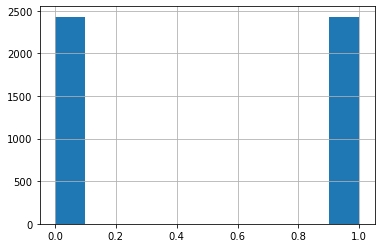

In [8]:
df.is_win.hist()

Text(0.5, 1.0, 'Histogram of Runs Scored')

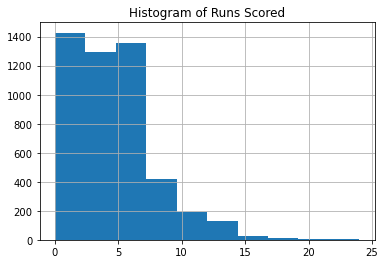

In [9]:
df.runs_scored.hist()
plt.title("Histogram of Runs Scored")

In [10]:
df.runs_scored.value_counts()

3     687
2     642
4     608
5     560
1     486
6     443
7     356
0     299
8     262
9     155
10    109
11     84
12     59
13     39
14     29
15     17
17      7
16      6
18      3
20      3
22      2
24      1
19      1
Name: runs_scored, dtype: int64

It looks like majority of games had less than 5 runs scored

Text(0.5, 1.0, 'Histogram of At Bats')

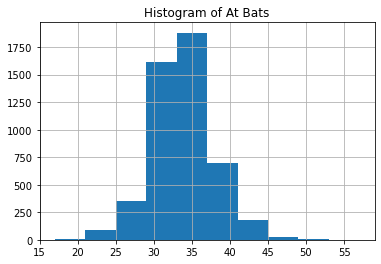

In [11]:
df.at_bats.hist()
plt.title("Histogram of At Bats")

In [12]:
df.at_bats.value_counts(), df.at_bats.min(), df.at_bats.max()

(33    571
 34    528
 32    502
 31    462
 35    419
 30    411
 36    363
 37    257
 29    238
 38    200
 28    164
 39    143
 27    105
 40     97
 41     74
 43     50
 26     49
 42     39
 24     37
 25     32
 23     28
 44     21
 45     16
 22     12
 21     10
 47      5
 46      5
 20      5
 50      4
 49      3
 48      2
 53      1
 18      1
 57      1
 17      1
 52      1
 51      1
 Name: at_bats, dtype: int64,
 17,
 57)

Most games had between 30-39 player at bats.

Text(0.5, 1.0, 'Histogram of Hits')

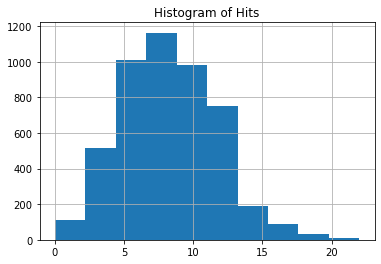

In [13]:
df.hits.hist()
plt.title("Histogram of Hits")

In [14]:
df.hits.value_counts()

8     588
7     575
6     550
9     537
5     459
10    446
11    353
4     333
12    246
3     184
13    154
14    106
2      84
15     83
16     60
17     29
18     23
1      19
0      11
19      8
20      5
22      3
21      2
Name: hits, dtype: int64

In [15]:
df.hits.mean()

8.127006998764925

Most games had about 8 hits.

Text(0.5, 1.0, 'Histogram of Doubles ')

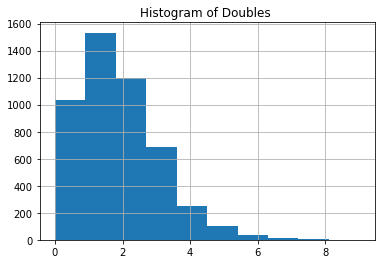

In [16]:
df.doubles.hist()
plt.title("Histogram of Doubles ")

In [17]:
df.doubles.value_counts()

1    1532
2    1197
0    1034
3     684
4     253
5     100
6      39
7      14
8       4
9       1
Name: doubles, dtype: int64

Most games had either one or two doubles.

Text(0.5, 1.0, 'Histogram of Triples Scored')

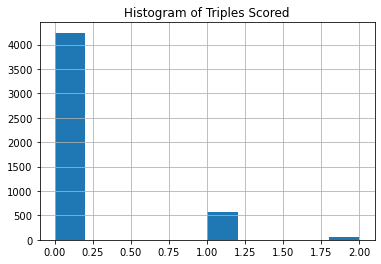

In [18]:
df.triples.hist()
plt.title("Histogram of Triples Scored")

In [19]:
df.triples.value_counts()

0    4242
1     562
2      54
Name: triples, dtype: int64

Most games did not have a triple in the game.

Text(0.5, 1.0, 'Histogram of Homeruns')

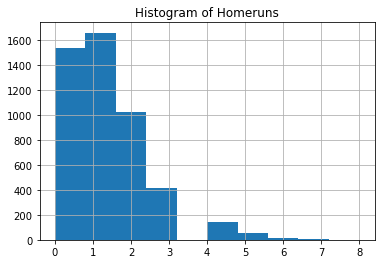

In [20]:
df.HR.hist()
plt.title("Histogram of Homeruns")

In [21]:
df.HR.value_counts()

1    1662
0    1536
2    1026
3     414
4     142
5      56
6      16
7       4
8       2
Name: HR, dtype: int64

About a third of the games had one homerun. Very few games had more than 5 homeruns.  

Text(0.5, 1.0, 'Histogram of Runs Batted In')

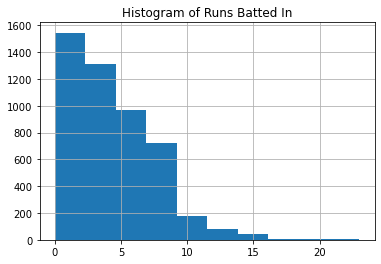

In [22]:
df.RBI.hist()
plt.title("Histogram of Runs Batted In")

In [23]:
df.RBI.value_counts()

3     702
2     682
4     606
5     564
1     535
6     407
7     354
0     327
8     222
9     142
10    106
11     72
12     42
13     37
14     29
15     11
17      7
16      5
20      3
18      2
22      2
23      1
Name: RBI, dtype: int64

Most games have between 1-5 runs batted in per game.

Text(0.5, 1.0, 'Histogram of Batting Average')

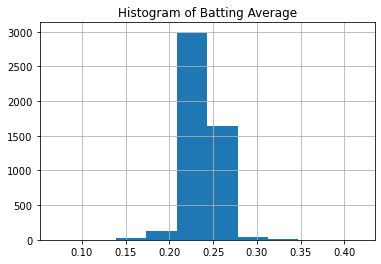

In [24]:
df.batting_avg.hist()
plt.title("Histogram of Batting Average")

Most teams have a batting average between 0.2 and 0.25

<AxesSubplot:>

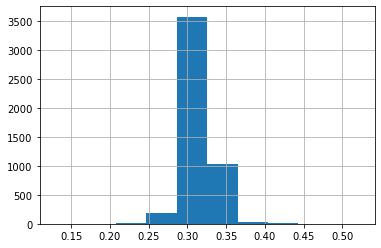

In [25]:
df.OBP.hist()

In [26]:
df.OBP.value_counts()

0.316    185
0.317    161
0.315    161
0.318    156
0.303    151
        ... 
0.430      1
0.447      1
0.240      1
0.231      1
0.271      1
Name: OBP, Length: 161, dtype: int64

Most teams have an On Base Percentage of about 0.30

<AxesSubplot:>

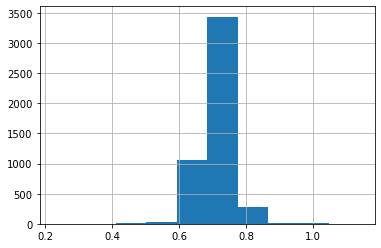

In [27]:
df.OPS.hist()

Most team have an On Base + Slugging Percentage of about 0.7.

<AxesSubplot:>

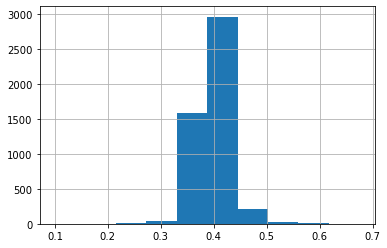

In [28]:
df.SLG.hist()

Most teams have a Slugging Percentage (Total bases / At Bats) of about 0.4

<AxesSubplot:>

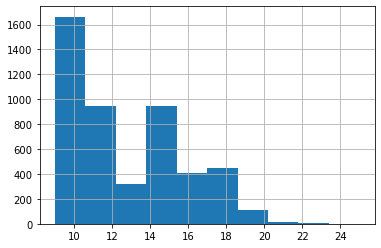

In [29]:
df.num_players_used.hist()

Most games used about 10 players

In [30]:
df.is_away.sum()

2429

Half of the games were away.  This is expected as one team is away and one is home when two teams play against each other.

<AxesSubplot:>

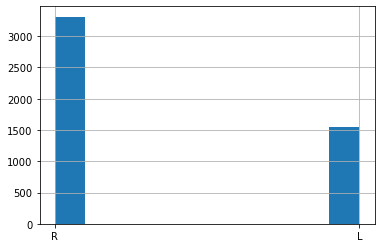

In [31]:
df.handedness_opp_pitcher.hist()

Most teams have right-handed pitchers.

## Split Data into Train, Validate, and Test Sets
#### Before exploring relationships between two or more variables, we will split the data into train, validate, and test sets.

In [32]:
train, validate, test = prepare.train_validate_test_split(df, 'is_win', seed=123)
train.shape, validate.shape, test.shape

((2720, 32), (1166, 32), (972, 32))

#### Bivariate Exploration